# 3. 신경망

- 가중치 매개변수의 적절한 값을 데이터로부터 자동으로 학습하는 능력이 신경망의 중요한 성질

## 3.1 퍼셉트론에서 신경망으로

- **퍼셉트론**

> $y = \begin{cases} 0 & (b + w_1x_1 + w_2x_2 \le 0) \\ 1 &  (b + w_1x_1 + w_2x_2 > 0) \end{cases}$ &nbsp;&nbsp;&nbsp;&nbsp; \[expression 3-1] <br>
> - $b$는 **편향**을 나타내는 매개변수로, 뉴런이 얼마나 쉽게 활성화 되느냐을 제어
> - $W_1$과 $W_2$는 각 신호의 **가중치**를 나타내는 매개변수로, 각 신호의 영향력을 제어

---
- **퍼셉트론 재해석**

> $y = h(b + w_1x_1 + w_2x_2)$ &nbsp;&nbsp;&nbsp;&nbsp; \[expression 3-2] <br>
> $h(x) = \begin{cases} 0 & (x \le 0) \\ 1 &  (x > 0) \end{cases}$ &nbsp;&nbsp;&nbsp;&nbsp; \[expression 3-3] <br>
> - [expression 3-2]는 입력 신호의 총합이 $h(x)$라는 함수를 거쳐 변환되어, 그 변환된 값이 y의 출력이 됨을 보여줌
> - 입력 신호의 총합을 출력 신호로 변환하는 함수를 일반적으로 **활성화 함수(Activation Function)** 이라 함
> - 활성화 함수는 입력 신호의 총합이 활성화를 일으키는지를 정하는 역할
> - \[expression 3-2]는 가중치가 곱해진 입력 신호의 총합을 계산하고, 그 합을 활성화 함수에 입력해 결과를 내는 2단계로 나눌 수 있음

> $\begin{cases} a = b + w_1x_1 + w_2x_2 && \text{[expression 3.4]} \\ y = h(a) && \text{[expression 3.5]} \end{cases}$ <br>
> - $a$는 입력 신호의 총합, $h(\ )$는 활성화 함수, y는 출력
> - 단순 퍼셉트론은 단층 네트워크에서 계단 함수(임계값을 경계로 출력이 바뀌는 함수)를 활성화 함수로 사용하고, <br>
    **다층 퍼셉트론은 신경망**(여러 층으로 구성되고 시그모이드 함수 등의 매끈한 활성화 함수를 사용하는 네트워크)을 가리킴

## 3.2 활성화 함수

### [시그모이드 함수(sigmoid function)]

- 신경망에서 자주 이용하는 활성화 함수인 **시그모이드 함수(sigmoid function)의 수식** ---- \[expression 3.6]

$$h(x) = \frac{1}{1 + e^{- x}}$$

> - $e$는 자연상수로 2.7182...의 값을 갖는 실수

In [1]:
# 계단함수
def step_function(x):      # x는 실수 만 받아들 임 (배열을 인수로 넣을 수 었음)
    if x > 0:
        return 1
    else:
        return 0

In [2]:
# numpy 배열도 지원하는 계단함수
def step_function(x):
    y = x > 0           # numpy 배열에 부등호 연산을 수행하면 배열의 원소 각각에 부등호 연산을 수행한 bool 배열을 생성
    return y.astype(np.int)         # astype() 함수로 numpy 배열의 자료형 변환 (python에서 bool을 int로 변환하면, True는 1로, False는 0으로 변환됨)

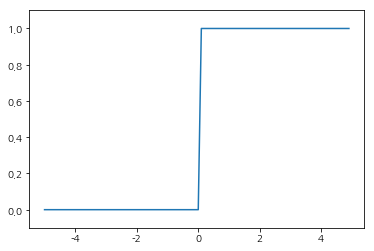

In [3]:
# 계단함수 그래프
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def step_function(x):
    return np.array(x > 0, dtype=np.int)

x = np.arange(-5.0, 5.0, 0.1)
y = step_function(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.show()

In [4]:
# 시그모이드 함수 (Sigmoid란 S자 모양이란 뜻)
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

- 이 함수가 numpy 배열도 훌륭히 처리해줄 수 있는 비밀은 numpy의 브로드캐스트 기능 때문

In [5]:
x = np.array([-1.0, 1.0, 2.0])
sigmoid(x)

array([0.26894142, 0.73105858, 0.88079708])

- numpy 브로드캐스트는 numpy 배열과 scalar 값의 연산을 numpy 배열의 원소 각각과 scalar 값의 연산으로 바꿔 수행하는 것 

In [6]:
# numpy broadcast
t = np.array([1.0, 2.0, 3.0])
print(1.0 + t)
print(1.0 / t)

[2. 3. 4.]
[1.         0.5        0.33333333]


(-0.1, 1.1)

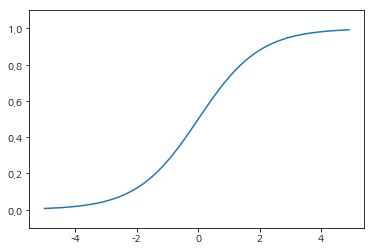

In [7]:
# 시그모이드 함수 그래프
x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1)
# plt.show()    # jupyter notebook에서 %matplotlib inline 어노테이션을 사용하면 plt.show() 함수를 호출하지 않아도 셀 실행시 그래프 출력함

- 시그모이드 함수는 부드러운 곡선이며, 입력에 따라 출력이 연속적으로 변화하는데, 계단 함수는 0을 경계로 출력이 0과 1로 나뉘어짐
- 시그모이드 함수와 계단 함수 둘다 입력이 아무리 작거나 커도 출력은 0에서 1 사이이며, 둘다 비선형 함수 임

---
- 함수란 어떤 값을 입력하면 그에 따른 값을 돌려주는 "변환기" 임. <br>
   변환기에 무언가 입력을 했을 때 출력이 입력의 상수배만큼 변하는 함수는 선형함수 이며, <br>
   수식으로는 $f(x) = a x + b$ 이고, 이때 $a$와 $b$는 상수
- 비선형 함수는 문자 그대로 "선형이 아닌" 함수. 즉, 직선 1개로는 그릴 수 없는 함수
- **신경망에서는 활성화 함수로 비선형 함수를 사용해야 함**
    - 선형 함수를 사용하면 신경망의 층을 깊게 하는 의미가 없어지기 때문
    - 선형 함수의 문제는 층을 아무리 깊게 해도 "은닉층이 없는 네트워크"로도 똑같은 기능을 할수 있다는데 있음
    - 예로, $h(x) = c x$를 활성화 함수로 사용한 3층 네트워크는 $y(x) = h(h(h(x)))$가 되고, $y(x) = c * c * c * x = c^3 x$ 가 되며, <br>
       $a = c^3$ 이라 정의하면 $y(x) = a x$가 되어, 은닉층이 없는 네트워크로와 같아짐

### [ReLU 함수 (Rectified Linear Unit)]

- **ReLU 함수 수식** &nbsp;&nbsp;&nbsp;&nbsp; ---- \[expression 3.7]

$$h(x) = \begin{cases} x && (x > 0) \\ 0 && (x \le 0) \end{cases}$$

> - 최근에는 신경망 분야에서 ReLU 함수를 주로 이용
> - **ReLU는 입력이 0을 넘으면 그 입력을 그대로 출력하고, 0 이하이면 0을 출력하는 함수**

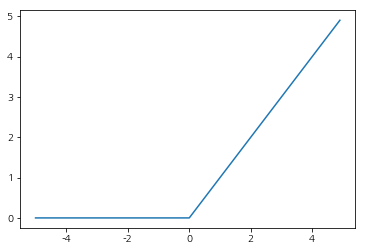

In [8]:
# ReLU 함수 그래프
def relu(x):
    return np.maximum(0, x)    # [expression 3.7]과 동일한 의미

x = np.arange(-5.0, 5.0, 0.1)
y = relu(x)
plt.plot(x, y)

## 3.3 다차원 배열의 계산

- 1차원, 2차원, 3차원 등을 일반화 하여 N 차원으로 표현하며, N 차원 배열을 다차원 배열 이라 함

In [9]:
A = np.array([1, 2, 3, 4])
print(A)
print(np.ndim(A))    # 배열의 차원 수
print(A.shape)         # 1차원 배열도 다차원 배열일 때와 통일된 형태(튜플)로 반환함
print(A.shape[0])

[1 2 3 4]
1
(4,)
4


- 2차원 배열은 **행렬(matrix)** 라고 부르고, 배열의 가로 방향을 **행(row)**, 세로 방향을 **열(column)** 이라 함
- **행렬은 굵은 글씨 대문자로 표시**

### [행렬의 내적(행열 곱)]

- 행렬 내적은 왼쪽 행렬의 행(가로)과 오른쪽 행렬의 열(세로 방향)을 원소별로 곱하고 그 값들을 더하여 계산
- **내적**을 **스칼라곱(scalar product)** 또는 **점곱(dot product)** 라고도 함
- 행령의 곱에서는 피연산자의 순서가 다르면 결과도 다름
- 내적을 위한 행렬 $(\mathbf{A}, \mathbf{B})$의 형상 : 왼쪽 행렬($\mathbf{A}$)의 열(1번째 차원)의 원소 수와 <br>
   오른쪽 행렬($\mathbf{B}$)의 행(0번째 차원)의 원소 수가 같아야 함. <br>
   행렬 $\mathbf{A}$와 $\mathbf{B}$의 대응하는(곱하기 연산에 대응되는 행과 열) 차원의 원소 수가 같아야 함       
- 행렬 내적의 계산 결과인 $\mathbf{C}$의 형상은 행렬 $\mathbf{A}$의 행 수와 행렬 $\mathbf{B}$의 열 수가 됨 

In [10]:
A = np.array([[1, 2], [3, 5]])
print(A.shape)
B = np.array([[5, 6], [7, 8]])
print(B.shape)
np.dot(A, B)     # dot() 매서드는 점곱(dot procuct)를 의미함 (내적을 의미함). 일반적으로 dot(A, B)와 dot(B, A)는 다른 값이 될 수 있음

(2, 2)
(2, 2)


array([[19, 22],
       [50, 58]])

In [11]:
A = np.array([[1, 2, 3], [4, 5, 6]])
B = np.array([[1, 2], [3, 4], [5, 6]])
print(A.shape)
print(B.shape)
np.dot(A, B)

(2, 3)
(3, 2)


array([[22, 28],
       [49, 64]])

In [12]:
A = np.array([[1, 2], [3, 4], [5, 6]])
B = np.array([7, 8])
print(A.shape)
print(B.shape)
np.dot(A, B)     # A가 2차원 배열이고, B가 1차원 배열 일때도 대응하는 차원의 원소 수는 일치 시켜야 함

(3, 2)
(2,)


array([23, 53, 83])

### [신경망의 내적]

- 신경망에서 각 층의 계산은 행렬의 내적으로 처리할 수 있음

In [13]:
X = np.array([1, 2])        # 1행 X 2열
print(X.shape)

W = np.array([[1, 3, 5], [2, 4, 6]])       # 2행 X 3열
print(W)
print(W.shape)

y = np.dot(X, W)
print(y)             # 1행 X 3열

(2,)
[[1 3 5]
 [2 4 6]]
(2, 3)
[ 5 11 17]


## 3.4 &nbsp; 3층 신경망 구현하기

- **신경망의 내적 표기법** 
    - 신경망 구성 예 : $\mathbf{x} \text{   -------->   } \ \mathbf{a_1} \text{-->} \mathbf{z_1} \text{   -------->   } \mathbf{a_2} \text{-->} \mathbf{z_2} \text{   -------->   } \mathbf{a_3} \text{-->} \mathbf{y}$
    - $\mathbf{x}$는 입력층(2개 노드 & 편향 노드), $\mathbf{a_1} \text{-->} \mathbf{z_1}$은 첫번째 은닉층(3개 노드), $\mathbf{a_2} \text{-->} \mathbf{z_2}$은 두번째 은닉층(2개 노드), $\mathbf{a_3} \text{-->} \mathbf{y}$는 출력층(2개 노드)

> 가중치 $\mathbf{w_{1 \ 2}^{(1)}}$ &nbsp;&nbsp;&nbsp;&nbsp; : 앞 층(입력층)의 2번째 뉴런($\mathbf{x_2}$)에서 다음 층(은닉층)의 1번째 뉴런($\mathbf{a_1^{(1)}}$)으로 향할 때의 가중치 매개변수

    - 가중치 오른쪽 아래의 인덱스 번호는 "다음 층 뉴런 번호, 앞 층 뉴런 번호"를 의미. 가중치 오른쪽 위 괄호 안의 인덱스 번호는 "가중치 적용 결과가 출력되는 층 번호"
    - 위에서 1은 다음 층의 1번째 뉴런, 2는 앞 층의 2번째 뉴런, (1)은 1층의 가중치(0층은 입력층, 1층이 은닉층의 첫번째 층)를 의미. <br>
       오른쪽 아래 인덱스를 반대 순서로 표기하는 경우도 있음

> 은닉층 뉴런 $\mathbf{a_{1}^{(1)}}$ &nbsp;&nbsp; : 1층의 첫번째 뉴런을 의미 --> 오른쪽 위의 (1)은 1층, 오른쪽 아래의 1은 첫번째를 의미

> 편향 $\mathbf{b_{1}^{(1)}}$ &nbsp;&nbsp;&nbsp;&nbsp; : 오른쪽 아래 인덱스가 하나 밖에 없음 (앞 층의 편향 뉴런이 하나 뿐이기 때문)

---
- **행렬의 내적을 이용한 은닉층 표현** (첫번째 은닉층)

> $\mathbf{a_{1}^{(1)} = w_{1 \ 1}^{(1)} \ x_{1} + w_{1 \ 2}^{(1)} \ x_{2} + b_{1}^{(1)}} \\
    \mathbf{a_{2}^{(1)} = w_{2 \ 1}^{(1)} \ x_{1} + w_{2 \ 2}^{(1)} \ x_{2} + b_{2}^{(1)}} \\
    \mathbf{a_{2}^{(1)} = w_{3 \ 1}^{(1)} \ x_{1} + w_{3 \ 2}^{(1)} \ x_{2} + b_{3}^{(1)}}$ &nbsp;&nbsp; ------------- \[expression 3.8]

    - 행렬의 내적을 이용한 간소화
> $\mathbf{A^{(1)} = X \ W^{(1)} + B^{(1)}}$ &nbsp;&nbsp; ------------- \[expression 3.9] <br>
   $\mathbf{A^{(1)} = \begin{bmatrix} a_{1}^{(1)} \ a_{2}^{(1)} \ a_{3}^{(1)} \end{bmatrix}}$, &nbsp;&nbsp;&nbsp;&nbsp;
   $\mathbf{X = \begin{bmatrix} x_{1} \ x_{2} \end{bmatrix}}$, &nbsp;&nbsp;&nbsp;&nbsp;
   $\mathbf{W^{(1)} = \begin{bmatrix} w_{1 \ 1}^{(1)} \ w_{2 \ 1}^{(1)} \ w_{3 \ 1}^{(1)} \\
                                                             w_{1 \ 2}^{(1)} \ w_{2 \ 2}^{(1)} \ w_{3 \ 2}^{(1)} \end{bmatrix}}$, &nbsp;&nbsp;&nbsp;&nbsp;
   $\mathbf{B^{(1)} = \begin{bmatrix} b_{1}^{(1)} \ b_{2}^{(1)} \ b_{3}^{(1)} \end{bmatrix}}$ <br>
   $\mathbf{X}$와 $\mathbf{W^{(1)}}$의 순서에 주의 --> \[expression 3.8]의 행과 열이 **Transpose(전치)** 되는 형태

In [14]:
# numpy 배열을 이용한 첫번째 은닉층 계산 (입력 신호, 가중치, 편향은 임의의 값으로 설정함)
X = np.array([1.0, 0.5])                                         # 1 X 2
W1 = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])    # 2 X 3
B1 = np.array([0.1, 0.2, 0.3])                                # 1 X 3

print(X.shape)
print(W1.shape)
print(B1.shape)

A1 = np.dot(X, W1) + B1     # [expression 3.9]과 동일함
print(A1)
print(A1.shape)                                                     # 1 X 3

(2,)
(2, 3)
(3,)
[0.3 0.7 1.1]
(3,)


- 은닉층에서의 가중치의 합(가중 신호와 편향의 총합)을 $\mathbf{a}$로 표기하고, 활성화 함수 $h( \ )$로 변환된 신호를 $\mathbf{z}$로 표기

In [15]:
Z1 = sigmoid(A1)
print(Z1)                                                            # 1 X 3

[0.57444252 0.66818777 0.75026011]


In [16]:
# 1층에서 2층으로 신호전달(두번째 은닉층 계산) : W2와 B2는 임의의 값으로 설정함
W2 = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])     # 3 X 2
B2 = np.array([0.1, 0.3])                                          # 1 X 2

print(Z1.shape)
print(W1.shape)
print(B1.shape)

A2 = np.dot(Z1, W2) + B2
Z2 = sigmoid(A2)

print(Z2)
print(Z2.shape)                                                       # 1 X 2

(3,)
(2, 3)
(3,)
[0.62624937 0.78818623]
(2,)


In [17]:
# 2층에서 출력층으로의 신호 전달 : W3와 B3는 임의의 값으로 설정함
def identity_function(x):     # 항등 함수
    return x

W3 = np.array([[0.1, 0.3], [0.2, 0.4]])                   # 2 X 2
B3 = np.array([0.1, 0.2])                                        # 1 X 2

A3 = np.dot(Z2, W3) + B3
y = identity_function(A3)                 # y는 A3와 동일함

print(A3)
print(y)

[0.32026218 0.7031493 ]
[0.32026218 0.7031493 ]


- **항등 함수**인 **identity_function( )**을 정의하고, 이를 출력층의 활성화 함수로 이용 (항등 함수는 입력을 그대로 출력하는 함수)
- **출력층의 활성화 함수는 $\sigma( \ )$로 표시** 하여 은닉층의 활성화 함수인 $h( )$와 다름을 명시 ($\sigma$는 "시그마" 라고 읽음)
- **출력층의 활성화 함수**는 풀고자 하는 문제의 성질에 맞게 정함. <br>
   **회귀**에는 **항등 함수**를, **2클래스 분류**에는 **시그모이드 함수**를, **다중 클래스 분류**에는 **소프트맥스 함수**를 사용하는 것이 일반적임

In [18]:
# 3층 신경망 구현 정리 (신경망 구현의 관례에 따라, 가중치만 대문자로 쓰고 그 외 편향과 중간결과 등은 모두 소문자로 표기함)
def sigmoid(x):
    return (1 / (1 + np.exp(-x)))

def identity_function(x):
    return x

def init_network():           # 가중치와 편향을 초기화 하고, 이들을 딕셔너리 변수인 network에 저장하여 반환
    network = {}
    network['W1'] = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
    network['b1'] = np.array([0.1, 0.2, 0.3])
    network['W2'] = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
    network['b2'] = np.array([0.1, 0.3]) 
    network['W3'] = np.array([[0.1, 0.3], [0.2, 0.4]])
    network['b3'] = np.array([0.1, 0.2])
    
    return network

def forward(network, x):         # 입력신호를 출력으로 변환하는 처리 과정 (forward라는 명칭은 순방향으로 전달됨을 의미. 순전파)
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'],network['b2'],network['b3']
    
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = identity_function(a3)
    
    return y

network = init_network()
x = np.array([1.0, 0.5])
y = forward(network, x)
print(y)    

[0.32026218 0.7031493 ]


## 3.5 출력층 설계하기

### [소프트맥스 함수(softmax function)]

- 분류에서 사용하는 **소프트맥스 함수(softmax function)** 수식 ---- \[expression 3.10]

$$y_k = \frac{e^{(a_k)}}{\sum\limits_{i=1}^{n} e^{(a_i)}}$$

> - $e^{(x)}$는 지수 함수 ($e$는 자연상수), $n$은 출력층의 뉴런 수, $y_k$는 k번째 출력, $a_k$는 $k$ 번째 뉴런
> - 소프트맥스 함수의 분자는 입력신호 $a_k$의 지수함수, 분모는 모든 입력 신호의 지수함수의 합

In [19]:
a = np.array([0.3, 2.9, 4.0])
exp_a = np.exp(a)              # 지수함수
print(exp_a)

sum_exp_a = np.sum(exp_a)
print(sum_exp_a)

y = exp_a / sum_exp_a       # 소프트맥스 함수 출력
print(y)

print(np.sum(y))                # 소트트맥스 함수 출력의 합은 "1" 이 됨 

[ 1.34985881 18.17414537 54.59815003]
74.1221542101633
[0.01821127 0.24519181 0.73659691]
1.0


In [20]:
# 소프트맥스 함수 정의 (오버 플로우 문제가 내제되어 있음)
def softmax(a):
    exp_a = np.exp(a)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    
    return y

In [21]:
softmax(a)

array([0.01821127, 0.24519181, 0.73659691])

- **소프트맥스 함수 구현 시 주의점**

> - 소프트맥스 함수는 지수 함수를 사용하는데, 지수 함수는 쉽게 아주 큰 결과값을 만들어 냄
> - $e^{10}$은 20,000 이 넘고, $e^{1000}$은 무한대를 뜻하는 "**inf**" 가 되어 돌아오며, 이런 큰 값끼리 나눗셈을 하면 결과가 "불안정" 해짐

### [개선된 소프트맥스 함수]

$$
y_k = \frac{e^{(a_k)}}{\sum\limits_{i=1}^{n} e^{(a_i)}} = \frac{C \ e^{(a_k)}}{C \ \sum\limits_{i=1}^{n} e^{(a_i)}} \\
= \frac{e^{(a_k + \log{C})}}{\sum\limits_{i=1}^{n} e^{(a_i + \log{C})}} \\
= \frac{e^{(a_k + C^{'})}}{\sum\limits_{i=1}^{n} e^{(a_i + C^{'})}} 
$$

> - 소프트맥스의 지수 함수를 계산할 때 어떤 정수를 더해도(혹은 빼도) 결과는 바뀌지 않는다는 것
> - 여기서 $C^{'}$에 어떤 값을 대입해도 상관 없지만, Overflow를 막을 목적으로는 **입력신호 중 최대값**을 이용하는 것이 일반적임

In [22]:
a = np.array([1010, 1000, 990])
print(softmax(a))         # 위에서 구현한 softmax 함수로는 제대로 계산되지 않음 (NaN을 return 함) --> jupyter notebook에서는 RuntimeWarning 메시지 출력

c = np.max(a)
print(a - c)

print(softmax(a-c))      # 입력신호에 입력신호 중 최대 값을 뺀 값을 softmax() 함수에 적용하면 정상 처리 됨

[nan nan nan]
[  0 -10 -20]
[9.99954600e-01 4.53978686e-05 2.06106005e-09]


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """


In [23]:
# 개선된 softmax 함수
def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a - c)            # overflow를 막기 위해 최대값을 빼줌
    sum_exp_a = np.sum(exp_a)        # overflow를 막기 위해 최대값을 빼줌
    y = exp_a / sum_exp_a
    
    return y

In [24]:
softmax(a)

array([9.99954600e-01, 4.53978686e-05, 2.06106005e-09])

- **소프트맥스 함수의 특징**

> - **소프트맥스 함수의 출력은 0에서 1사이의 실수**
> - **소프트맥스 함수의 출력의 합은 "1"** 이고, 이 성질 덕분에 소프트맥스 함수의 출력을 **확율**로 해석할 수 있음
> - 소프트맥스 함수를 적용해도 각 원소의 대소 관계는 변하지 않음. 이는 지수함수 $y = e^{x}$가 단조 증가 함수이기 때문. <br>
     앞의 예에서 $a$의 원소들 사이의 대소 관계가 $y$의 원소들 사이의 대소관계로 그대로 이어짐

---
- 신경망의 분류에서는 일반적으로 가장 큰 출력을 내는 뉴런에 해당하는 클래스로 만 인식함
- 소프트맥스 함수를 적용해도 출력이 가장 큰 뉴런의 위치는 달라지지 않음
- 결론적으로, 신경망으로 분류 할 때는 출력층의 소프트맥스 함수를 생략해도 됨

---
- 기계학습 문제 풀이는 **학습**과 **추론(inference)** 두 단계를 거쳐 이루어짐
- 추론 단계에서는 출력층의 소프트맥스 함수를 생략하는 것이 일반적임. 학습 시킬 때는 소프트맥스 함수를 사용
- 추론 과정을 신경망의 **순전파(forward propagation)** 이라고도 함

---
- 출력층의 뉴런 수는 풀려는 문제에 맞게 적절히 정해야 함. 분류에서는 분류하고자 하는 클래스 수로 설정하는 것이 일반적임

## 3.6 손글씨 숫자 인식

- **MNIST 데이터 셋** : 손글씨 숫자 이미지 집합
    - MNIST 이미지 데이터는 28X28 크기의 회색조 이미지 이며, 각 필셀은 0에서 255까지의 값을 취함
    - 각 이미지에는 이미지가 실제 의미하는 숫자가 레이블로 붙어 있음

In [25]:
import sys, os
sys.path.append(os.pardir)
from dataset.mnist import load_mnist

(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=False)

print(x_train.shape)
print(t_train.shape)
print(x_test.shape)
print(t_test.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


- normalize : 입력 이미지의 픽셀 값을 0.1 ~ 1.0 사이의 값으로 정규화 할지를 정함
- flatten : 입력 이미지를 평탄하게, 즉 1차원 배열로 만들지를 정함. <br>
   False로 설정하면 입력 이미지를 1 X 28 X 28의 3차원 배열로, True로 설정하면 입력 784개로 이루어진 1아원 배열로 저장
- one_hot_label : 레이블을 원 핫 인코딩(one hot encoding) 형태로 저장할지를 정함.<br>
   one hot encoding이란 정답을 뜻하는 원소만 1이고 나머지는 모두 0인 배열

5
(784,)
(28, 28)


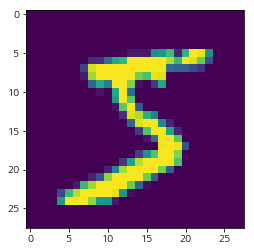

In [26]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
from dataset.mnist import load_mnist

(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=False)

img = x_train[0]
label = t_train[0]
print(label)
print(img.shape)
img = img.reshape(28, 28)
print(img.shape)

plt.imshow(img)

# from PIL import Image

# def img_show(img):
#     pil_img = Image.fromarray(np.uint8(img))
#     pil_img.show()

# img_show(img)

- **신경망의 추론 처리** : MNIST 데이터셋 추론 신경망 구현
    - 입력층 뉴런은 784개(28 * 28 이미지), 출력층 뉴런은 10개(0~9까지 숫자)
    - 은닉층은 2개(첫번째 은닉층은 50개 뉴런, 두번째 은닉층은 100개, 은닉층 뉴런 수는 임의로 정한 값)

In [27]:
import pickle    # python 객체(리스트나 클래스 같은 자료형)을 파일로 저장하고 읽어들이기 위한 모듈

def get_data():     # 추론 만 할 예정이기 때문에 Test 데이터 셋 만 Return
    # MNIST 데이터 읽어오기 (normalize=True 는 0~255 까지의 픽셀 값을 0.0~1.0 사이의 값으로 변환, flatten=True 는 28*28 이미지를 1차원 배열로 변환)
    (X_train, t_train), (X_test, t_test) = load_mnist(normalize=True, flatten=True, one_hot_label=False)
    return X_test, t_test

def init_network():       # 학습된 가중치 매개변수 값은 교재에서 제공하는 파일(sample_weight.pkl)로 부터 읽어들임
    with open("sample_weight.pkl", "rb") as f:        # sample_weight.pkl(가중치와 편향이 딕셔너리 형태로 저장되어 있는 파일)은 현재 폴더에 있어야 함
        network = pickle.load(f)
    return network

def predict(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = softmax(a3)      # 0~9까지 각 레이블의 확율이 저장되어 있음
    
    return y

In [28]:
x, t = get_data()
network = init_network()

accuracy_cnt = 0
for i in range(len(x)):
    y = predict(network, x[i])
    p = np.argmax(y)      # 값이 가장 큰(확율이 가장 높은) 원소의 인덱스를 구함 (인덱스 값이 레이블 값과 같음)
    if p == t[i]:
        accuracy_cnt += 1
        
print("Accuracy: " + str(float(accuracy_cnt) / len(x)))

Accuracy: 0.9352


In [29]:
# 배치 처리
x, _ = get_data()
network = init_network()
W1, W2, W3 = network['W1'], network['W2'], network['W3']

print(x.shape)
print(x[0].shape)
print(W1.shape)
print(W2.shape)
print(W3.shape)

(10000, 784)
(784,)
(784, 50)
(50, 100)
(100, 10)


- 다차원 배열의 대응하는 차원의 원소 수가 일치함 (편향은 생략)
    - x 열과 W1 행(784), W1 열과 W2 행(50), W2 열과 W3 행(100)의 원소 수가 일치 : 출력은 x 행, W3 열(10000, 10)
- 하나로 묶은 입력 데이터를 배치(batch)라 함 : 예로, 10000개의 입력 데이터를 100개 씩 한꺼번에 predit 할 경우, 100개의 입력 데이터를 1 batch 라 함

In [30]:
x, t = get_data()
network = init_network()

batch_size = 100
accuracy_cnt = 0

for i in range(0, len(x), batch_size):    # 100개 단위로 처리 (i에는 0, 100, 200, ... 처럼 할당됨)
    x_batch = x[i:i+batch_size]              # x_batch에는 x[0:100], x[100:200], ... 처럼 100개 씩 할당됨
    y_batch = predict(network, x_batch)      # 한 번에 100개를 predict (위에서 predict 함수는 numpy 배열을 처리하도록 만들었음) : 결과는 (100, 10) numpy 배열로 저장됨
    p = np.argmax(y_batch, axis=1)       # 100개의 레이블 값 (axis=1 은 각 행의 "열 값 중"에 최대 값을 찾으라는 의미)
    accuracy_cnt += np.sum(p == t[i:i+batch_size])   # numpy 배열끼리 "==" 연산으로 True/False로 구성된 bool 배열을 만들고, sum을 하면 True 값의 개수가 산출됨 
    
print("Accuracy: ", str(float(accuracy_cnt) / len(x)))

Accuracy:  0.9352
